In [1]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control

#### Criando antescedente (entrada/input)

c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


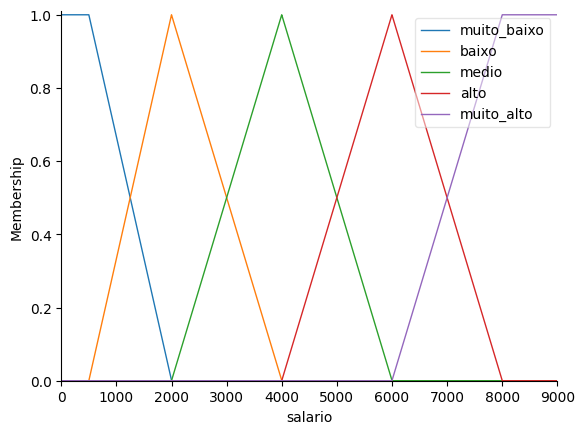

In [2]:
# Definindo universo de discurso e nome da variável
universo = np.arange(0, 9001)

salario = control.Antecedent(universe = universo, label = "salario")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
salario["muito_baixo"] = fuzzy.trapmf(salario.universe, [0, 0, 500, 2000])
salario["baixo"] = fuzzy.trimf(salario.universe, [500, 2000, 4000])
salario["medio"] = fuzzy.trimf(salario.universe, [2000, 4000, 6000])
salario["alto"] = fuzzy.trimf(salario.universe, [4000, 6000, 8000])
salario["muito_alto"] = fuzzy.trapmf(salario.universe, [6000, 8000, 9000, 9000])


salario.view()


#### Criando consequent (saída/output)

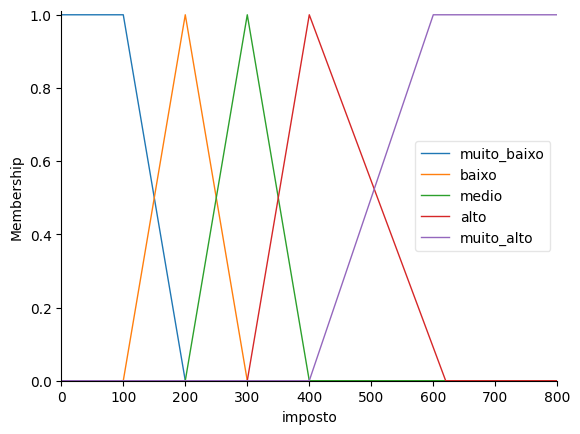

In [3]:
# Universo do imposto
universo_imposto = np.arange(0, 801)

imposto = control.Consequent(universe = universo_imposto, label = "imposto")

imposto["muito_baixo"] = fuzzy.trapmf(imposto.universe, [0, 0, 100, 200])
imposto["baixo"] = fuzzy.trimf(imposto.universe, [100, 200, 300])
imposto["medio"] = fuzzy.trimf(imposto.universe, [200, 300, 400])
imposto["alto"] = fuzzy.trimf(imposto.universe, [300, 400, 620])
imposto["muito_alto"] = fuzzy.trapmf(imposto.universe, [400, 600, 800, 800])

imposto.view()

#### Criando regras

In [4]:
# REGRA -> expressão X, resultado Y

regra1 = control.Rule(salario["baixo"], imposto["alto"])
regra2 = control.Rule(salario["medio"], imposto["medio"])

#### Criando sistema

In [5]:
# Adicionando regras ao controle
imposto_controle = control.ControlSystem([regra1, regra2])

# Criando sistema com o controle de imposto
sistema = control.ControlSystemSimulation(imposto_controle)

Resultado 'desfuzzificado': 300.00000000000034


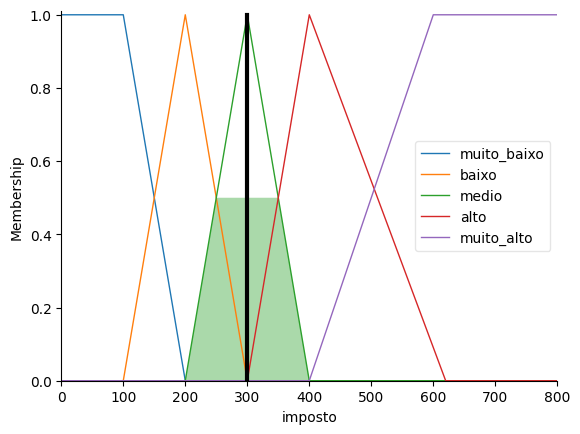

In [6]:
sistema.input["salario"] = 5000

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['imposto']}")

imposto.view(sim = sistema)